In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import utils
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from importlib import reload
import base
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
tfpl = tfp.layers
tfk = tf.keras
tfkl = tf.keras.layers
import cvae_tfp
tf.keras.backend.set_floatx('float32')

In [20]:
data.T.shape

(2, 1000)

In [21]:
conditions.shape

(1000,)

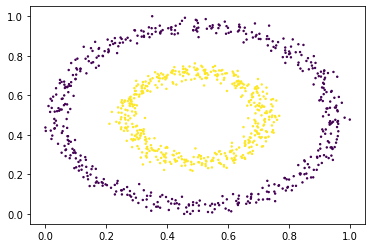

In [2]:
data, conditions = make_circles(n_samples=1000, noise=0.05, factor=0.5)
data = np.float32(data)
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
# Plot dataset
plt.scatter(*data.T, c=conditions, s=2)
plt.show()
data = utils.as_float_array(data)
data_cond = utils.as_float_array(conditions)
data_cond = data_cond.reshape(-1, 1)

## Normal

In [3]:
reload(cvae_tfp)
data_dim = 2
cond_dim = 1
latent_dim = 4
hidden_dim = 50
x_input = [data, data_cond]
encoder = cvae_tfp.Encoder(data_dim, cond_dim, latent_dim, hidden_dim)
sampler = cvae_tfp.NormalSampler(latent_dim)
encodersampler = cvae_tfp.EncoderSampler(encoder,sampler)
decoder = cvae_tfp.Decoder(data_dim, cond_dim, latent_dim, hidden_dim)
weight = 0.02
model_normal = cvae_tfp.CVAE_circle(data_dim, cond_dim, latent_dim, hidden_dim, weight, decoder, encodersampler, analytic = True)
def zero_error(y_true, y_pred):
    return tf.constant(0., dtype='float32')
model_normal.compile(optimizer='adam', loss=zero_error)
model_normal.evaluate(x = x_input, y = x_input[0])

Instructions for updating:
Do not pass `graph_parents`.  They will  no longer be used.
32/32 [==============================] - 1s 949us/step - loss: 0.1354


0.1381710171699524

In [4]:
model_normal.fit(x = [data, data_cond], y = np.zeros(shape= (data.shape[0],1)), epochs=10000,\
                 batch_size=data.shape[0], verbose = True)

Epoch 1/10000
1/1 [==============================] - 1s 700ms/step - loss: 0.1375
Epoch 2/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1355
Epoch 3/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1351
Epoch 4/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1308
Epoch 5/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1323
Epoch 6/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.1309
Epoch 7/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1289
Epoch 8/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1310
Epoch 9/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1285
Epoch 10/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1280
Epoch 11/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1284
Epoch 12/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.1280
Epoch 13/10000
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 0.1195
Epoch 103/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1196
Epoch 104/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1182
Epoch 105/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1186
Epoch 106/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1202
Epoch 107/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1170
Epoch 108/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1174
Epoch 109/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.1182
Epoch 110/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1156
Epoch 111/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1177
Epoch 112/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1171
Epoch 113/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1175
Epoch 114/10000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 0.0883
Epoch 203/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0870
Epoch 204/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0832
Epoch 205/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0844
Epoch 206/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0829
Epoch 207/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0855
Epoch 208/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0833
Epoch 209/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0861
Epoch 210/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0797
Epoch 211/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0837
Epoch 212/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0830
Epoch 213/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0839
Epoch 214/10000
1/1 [===========

1/1 [==============================] - 0s 5ms/step - loss: 0.0631
Epoch 303/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0642
Epoch 304/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0645
Epoch 305/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0670
Epoch 306/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0641
Epoch 307/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0660
Epoch 308/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0641
Epoch 309/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0609
Epoch 310/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0633
Epoch 311/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0644
Epoch 312/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0604
Epoch 313/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0635
Epoch 314/10000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 0.0603
Epoch 403/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0615
Epoch 404/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0589
Epoch 405/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0588
Epoch 406/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0585
Epoch 407/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0581
Epoch 408/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0598
Epoch 409/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0594
Epoch 410/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0568
Epoch 411/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0608
Epoch 412/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0586
Epoch 413/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0586
Epoch 414/10000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0542
Epoch 503/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0556
Epoch 504/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0551
Epoch 505/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0587
Epoch 506/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0565
Epoch 507/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0545
Epoch 508/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0577
Epoch 509/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0548
Epoch 510/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0564
Epoch 511/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0559
Epoch 512/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0559
Epoch 513/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0551
Epoch 514/10000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 0.0543
Epoch 603/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0537
Epoch 604/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0542
Epoch 605/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0541
Epoch 606/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0538
Epoch 607/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0540
Epoch 608/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0540
Epoch 609/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0561
Epoch 610/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0539
Epoch 611/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0552
Epoch 612/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0544
Epoch 613/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0530
Epoch 614/10000
1/1 [===========

1/1 [==============================] - 0s 5ms/step - loss: 0.0528
Epoch 703/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0531
Epoch 704/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0539
Epoch 705/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0518
Epoch 706/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0521
Epoch 707/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0510
Epoch 708/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0519
Epoch 709/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0524
Epoch 710/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0530
Epoch 711/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0525
Epoch 712/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0528
Epoch 713/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0516
Epoch 714/10000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 0.0510
Epoch 803/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0519
Epoch 804/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0511
Epoch 805/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0503
Epoch 806/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0509
Epoch 807/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0509
Epoch 808/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0512
Epoch 809/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0506
Epoch 810/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0516
Epoch 811/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0504
Epoch 812/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0517
Epoch 813/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0505
Epoch 814/10000
1/1 [===========

1/1 [==============================] - 0s 6ms/step - loss: 0.0490
Epoch 903/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0507
Epoch 904/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0508
Epoch 905/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0496
Epoch 906/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0490
Epoch 907/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0499
Epoch 908/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0502
Epoch 909/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0490
Epoch 910/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0507
Epoch 911/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0500
Epoch 912/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0495
Epoch 913/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0500
Epoch 914/10000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0503
Epoch 1003/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0501
Epoch 1004/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0503
Epoch 1005/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0509
Epoch 1006/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0491
Epoch 1007/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0497
Epoch 1008/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0501
Epoch 1009/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0489
Epoch 1010/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0499
Epoch 1011/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0507
Epoch 1012/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0492
Epoch 1013/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0501
Epoch 1014/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0507
Epoch 1101/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0496
Epoch 1102/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0488
Epoch 1103/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0511
Epoch 1104/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0491
Epoch 1105/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0494
Epoch 1106/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0504
Epoch 1107/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0503
Epoch 1108/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0496
Epoch 1109/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0482
Epoch 1110/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0491
Epoch 1111/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0505
Epoch 1112/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0500
Epoch 1199/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0484
Epoch 1200/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0488
Epoch 1201/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0493
Epoch 1202/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0486
Epoch 1203/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0483
Epoch 1204/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0501
Epoch 1205/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0485
Epoch 1206/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0502
Epoch 1207/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0476
Epoch 1208/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0493
Epoch 1209/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0492
Epoch 1210/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0492
Epoch 1297/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0494
Epoch 1298/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0492
Epoch 1299/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0486
Epoch 1300/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0481
Epoch 1301/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0483
Epoch 1302/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0495
Epoch 1303/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0492
Epoch 1304/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0487
Epoch 1305/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0481
Epoch 1306/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0489
Epoch 1307/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0482
Epoch 1308/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0486
Epoch 1395/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0476
Epoch 1396/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0486
Epoch 1397/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0481
Epoch 1398/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0492
Epoch 1399/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0487
Epoch 1400/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0485
Epoch 1401/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0492
Epoch 1402/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0482
Epoch 1403/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0485
Epoch 1404/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0479
Epoch 1405/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0483
Epoch 1406/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0485
Epoch 1493/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0476
Epoch 1494/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0479
Epoch 1495/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0488
Epoch 1496/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0491
Epoch 1497/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0489
Epoch 1498/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0485
Epoch 1499/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0485
Epoch 1500/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0478
Epoch 1501/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0488
Epoch 1502/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0480
Epoch 1503/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0494
Epoch 1504/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0496
Epoch 1591/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0486
Epoch 1592/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0494
Epoch 1593/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0483
Epoch 1594/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0478
Epoch 1595/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0494
Epoch 1596/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0481
Epoch 1597/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0477
Epoch 1598/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0481
Epoch 1599/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0489
Epoch 1600/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0482
Epoch 1601/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0487
Epoch 1602/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0483
Epoch 1689/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0483
Epoch 1690/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0477
Epoch 1691/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0489
Epoch 1692/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0488
Epoch 1693/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0477
Epoch 1694/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0492
Epoch 1695/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0473
Epoch 1696/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0472
Epoch 1697/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0483
Epoch 1698/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0489
Epoch 1699/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0490
Epoch 1700/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0495
Epoch 1787/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0466
Epoch 1788/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0502
Epoch 1789/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0489
Epoch 1790/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0491
Epoch 1791/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0489
Epoch 1792/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0479
Epoch 1793/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0492
Epoch 1794/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0477
Epoch 1795/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0488
Epoch 1796/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0476
Epoch 1797/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0482
Epoch 1798/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0483
Epoch 1885/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0475
Epoch 1886/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0483
Epoch 1887/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0482
Epoch 1888/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0492
Epoch 1889/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0468
Epoch 1890/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0478
Epoch 1891/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0492
Epoch 1892/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0474
Epoch 1893/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0474
Epoch 1894/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0488
Epoch 1895/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0474
Epoch 1896/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0469
Epoch 1983/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0468
Epoch 1984/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0482
Epoch 1985/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0479
Epoch 1986/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0482
Epoch 1987/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0478
Epoch 1988/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0473
Epoch 1989/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0497
Epoch 1990/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0476
Epoch 1991/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0487
Epoch 1992/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0484
Epoch 1993/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0472
Epoch 1994/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0485
Epoch 2081/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0469
Epoch 2082/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0481
Epoch 2083/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0478
Epoch 2084/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0483
Epoch 2085/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0481
Epoch 2086/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0485
Epoch 2087/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0464
Epoch 2088/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0485
Epoch 2089/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0472
Epoch 2090/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0489
Epoch 2091/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0467
Epoch 2092/10000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 0.0472
Epoch 2179/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0490
Epoch 2180/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0473
Epoch 2181/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0474
Epoch 2182/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0486
Epoch 2183/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0477
Epoch 2184/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0473
Epoch 2185/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0469
Epoch 2186/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0483
Epoch 2187/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0479
Epoch 2188/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0479
Epoch 2189/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0490
Epoch 2190/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0475
Epoch 2277/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0482
Epoch 2278/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0475
Epoch 2279/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0478
Epoch 2280/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0477
Epoch 2281/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0473
Epoch 2282/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0475
Epoch 2283/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0482
Epoch 2284/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0493
Epoch 2285/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0478
Epoch 2286/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0475
Epoch 2287/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0488
Epoch 2288/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0475
Epoch 2375/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0485
Epoch 2376/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0490
Epoch 2377/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0478
Epoch 2378/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0471
Epoch 2379/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0473
Epoch 2380/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0481
Epoch 2381/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0479
Epoch 2382/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0466
Epoch 2383/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0474
Epoch 2384/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0462
Epoch 2385/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0468
Epoch 2386/10000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 0.0481
Epoch 2473/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0480
Epoch 2474/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0478
Epoch 2475/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0492
Epoch 2476/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0478
Epoch 2477/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0483
Epoch 2478/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0478
Epoch 2479/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0472
Epoch 2480/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.0478
Epoch 2481/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0480
Epoch 2482/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0471
Epoch 2483/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0489
Epoch 2484/10000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 0.0484
Epoch 2571/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0462
Epoch 2572/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0468
Epoch 2573/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0471
Epoch 2574/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0479
Epoch 2575/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0471
Epoch 2576/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0474
Epoch 2577/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0484
Epoch 2578/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0489
Epoch 2579/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0470
Epoch 2580/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0482
Epoch 2581/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0480
Epoch 2582/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0474
Epoch 2669/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0476
Epoch 2670/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0472
Epoch 2671/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0472
Epoch 2672/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0479
Epoch 2673/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0481
Epoch 2674/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0482
Epoch 2675/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0468
Epoch 2676/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0490
Epoch 2677/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0467
Epoch 2678/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0474
Epoch 2679/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0490
Epoch 2680/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0482
Epoch 2767/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0485
Epoch 2768/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0484
Epoch 2769/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0475
Epoch 2770/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0475
Epoch 2771/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0471
Epoch 2772/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0481
Epoch 2773/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0483
Epoch 2774/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0467
Epoch 2775/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0472
Epoch 2776/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0474
Epoch 2777/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0479
Epoch 2778/10000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 0.0480
Epoch 2865/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0467
Epoch 2866/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0467
Epoch 2867/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0471
Epoch 2868/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0468
Epoch 2869/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0481
Epoch 2870/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0479
Epoch 2871/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0472
Epoch 2872/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0472
Epoch 2873/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0468
Epoch 2874/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0486
Epoch 2875/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0489
Epoch 2876/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0470
Epoch 2963/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0475
Epoch 2964/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0470
Epoch 2965/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0475
Epoch 2966/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0474
Epoch 2967/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0467
Epoch 2968/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0468
Epoch 2969/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0478
Epoch 2970/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0464
Epoch 2971/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0483
Epoch 2972/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0471
Epoch 2973/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0465
Epoch 2974/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0468
Epoch 3061/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0480
Epoch 3062/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0470
Epoch 3063/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0482
Epoch 3064/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0477
Epoch 3065/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0479
Epoch 3066/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0485
Epoch 3067/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0485
Epoch 3068/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0474
Epoch 3069/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0483
Epoch 3070/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0471
Epoch 3071/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0470
Epoch 3072/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0473
Epoch 3159/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0474
Epoch 3160/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0475
Epoch 3161/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0469
Epoch 3162/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0482
Epoch 3163/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0483
Epoch 3164/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0481
Epoch 3165/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0466
Epoch 3166/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0472
Epoch 3167/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0475
Epoch 3168/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0482
Epoch 3169/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0469
Epoch 3170/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0470
Epoch 3257/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0464
Epoch 3258/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0483
Epoch 3259/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0475
Epoch 3260/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0479
Epoch 3261/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0486
Epoch 3262/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0470
Epoch 3263/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0491
Epoch 3264/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0469
Epoch 3265/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0472
Epoch 3266/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0478
Epoch 3267/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0475
Epoch 3268/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0478
Epoch 3355/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0467
Epoch 3356/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0477
Epoch 3357/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0467
Epoch 3358/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0468
Epoch 3359/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0465
Epoch 3360/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0480
Epoch 3361/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0477
Epoch 3362/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0461
Epoch 3363/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0470
Epoch 3364/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0476
Epoch 3365/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0481
Epoch 3366/10000
1/1 

1/1 [==============================] - 0s 5ms/step - loss: 0.0472
Epoch 3453/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0474
Epoch 3454/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0488
Epoch 3455/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0465
Epoch 3456/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0475
Epoch 3457/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0456
Epoch 3458/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0472
Epoch 3459/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0478
Epoch 3460/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0476
Epoch 3461/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0486
Epoch 3462/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0465
Epoch 3463/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0470
Epoch 3464/10000
1/1 

1/1 [==============================] - 0s 5ms/step - loss: 0.0470
Epoch 3551/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0491
Epoch 3552/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0467
Epoch 3553/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0472
Epoch 3554/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0466
Epoch 3555/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0481
Epoch 3556/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0479
Epoch 3557/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0469
Epoch 3558/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0470
Epoch 3559/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0477
Epoch 3560/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0476
Epoch 3561/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0479
Epoch 3562/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0462
Epoch 3649/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0467
Epoch 3650/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0478
Epoch 3651/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0480
Epoch 3652/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0464
Epoch 3653/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0474
Epoch 3654/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0485
Epoch 3655/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0472
Epoch 3656/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0462
Epoch 3657/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0465
Epoch 3658/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0490
Epoch 3659/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0464
Epoch 3660/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0477
Epoch 3747/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0476
Epoch 3748/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0462
Epoch 3749/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0472
Epoch 3750/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0479
Epoch 3751/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0476
Epoch 3752/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0475
Epoch 3753/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0472
Epoch 3754/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0457
Epoch 3755/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0466
Epoch 3756/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0467
Epoch 3757/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0486
Epoch 3758/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0460
Epoch 3845/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0475
Epoch 3846/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0481
Epoch 3847/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0472
Epoch 3848/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0491
Epoch 3849/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0462
Epoch 3850/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0463
Epoch 3851/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0476
Epoch 3852/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0464
Epoch 3853/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0473
Epoch 3854/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0477
Epoch 3855/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0484
Epoch 3856/10000
1/1 

1/1 [==============================] - 0s 5ms/step - loss: 0.0464
Epoch 3943/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0470
Epoch 3944/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0471
Epoch 3945/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0475
Epoch 3946/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0481
Epoch 3947/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0476
Epoch 3948/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0482
Epoch 3949/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0486
Epoch 3950/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0472
Epoch 3951/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0478
Epoch 3952/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0482
Epoch 3953/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0473
Epoch 3954/10000
1/1 

1/1 [==============================] - 0s 6ms/step - loss: 0.0488
Epoch 4041/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0474
Epoch 4042/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0471
Epoch 4043/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0468
Epoch 4044/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0478
Epoch 4045/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0487
Epoch 4046/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0473
Epoch 4047/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0470
Epoch 4048/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0487
Epoch 4049/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0482
Epoch 4050/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0476
Epoch 4051/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0479
Epoch 4052/10000
1/1 

1/1 [==============================] - 0s 5ms/step - loss: 0.0465
Epoch 4139/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0473
Epoch 4140/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0477
Epoch 4141/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0473
Epoch 4142/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0471
Epoch 4143/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0476
Epoch 4144/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0466
Epoch 4145/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0472
Epoch 4146/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0474
Epoch 4147/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0471
Epoch 4148/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0470
Epoch 4149/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0466
Epoch 4150/10000
1/1 

1/1 [==============================] - 0s 5ms/step - loss: 0.0476
Epoch 4237/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0458
Epoch 4238/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0469
Epoch 4239/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0468
Epoch 4240/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0470
Epoch 4241/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0463
Epoch 4242/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0479
Epoch 4243/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0476
Epoch 4244/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0481
Epoch 4245/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0463
Epoch 4246/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0468
Epoch 4247/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0459
Epoch 4248/10000
1/1 

1/1 [==============================] - 0s 5ms/step - loss: 0.0466
Epoch 4335/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0464
Epoch 4336/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0464
Epoch 4337/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0467
Epoch 4338/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0472
Epoch 4339/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0466
Epoch 4340/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0485
Epoch 4341/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0473
Epoch 4342/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0475
Epoch 4343/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0483
Epoch 4344/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0467
Epoch 4345/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0474
Epoch 4346/10000
1/1 

1/1 [==============================] - 0s 5ms/step - loss: 0.0473
Epoch 4433/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0466
Epoch 4434/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0467
Epoch 4435/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0482
Epoch 4436/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0483
Epoch 4437/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0477
Epoch 4438/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0479
Epoch 4439/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0466
Epoch 4440/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0469
Epoch 4441/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0467
Epoch 4442/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0476
Epoch 4443/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0472
Epoch 4444/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0471
Epoch 4531/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0477
Epoch 4532/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0478
Epoch 4533/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0473
Epoch 4534/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0464
Epoch 4535/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0467
Epoch 4536/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0486
Epoch 4537/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0476
Epoch 4538/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0468
Epoch 4539/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0474
Epoch 4540/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0480
Epoch 4541/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0478
Epoch 4542/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0476
Epoch 4629/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0464
Epoch 4630/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0483
Epoch 4631/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0480
Epoch 4632/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0469
Epoch 4633/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0467
Epoch 4634/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0463
Epoch 4635/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0469
Epoch 4636/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0475
Epoch 4637/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0481
Epoch 4638/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0468
Epoch 4639/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0461
Epoch 4640/10000
1/1 

1/1 [==============================] - 0s 5ms/step - loss: 0.0466
Epoch 4727/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0474
Epoch 4728/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0467
Epoch 4729/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0471
Epoch 4730/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0463
Epoch 4731/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0482
Epoch 4732/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0473
Epoch 4733/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0476
Epoch 4734/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0459
Epoch 4735/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0472
Epoch 4736/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0478
Epoch 4737/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0472
Epoch 4738/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0482
Epoch 4825/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0468
Epoch 4826/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0470
Epoch 4827/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0482
Epoch 4828/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0491
Epoch 4829/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0455
Epoch 4830/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0485
Epoch 4831/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0481
Epoch 4832/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0479
Epoch 4833/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0462
Epoch 4834/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0473
Epoch 4835/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0469
Epoch 4836/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0469
Epoch 4923/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0465
Epoch 4924/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0468
Epoch 4925/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0474
Epoch 4926/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0479
Epoch 4927/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0482
Epoch 4928/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0470
Epoch 4929/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0471
Epoch 4930/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0463
Epoch 4931/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0470
Epoch 4932/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0477
Epoch 4933/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0462
Epoch 4934/10000
1/1 

1/1 [==============================] - 0s 5ms/step - loss: 0.0473
Epoch 5021/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0466
Epoch 5022/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0473
Epoch 5023/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0475
Epoch 5024/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0464
Epoch 5025/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0463
Epoch 5026/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0472
Epoch 5027/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0465
Epoch 5028/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0467
Epoch 5029/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0477
Epoch 5030/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0477
Epoch 5031/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0485
Epoch 5032/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0465
Epoch 5119/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0466
Epoch 5120/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0463
Epoch 5121/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0474
Epoch 5122/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0479
Epoch 5123/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0463
Epoch 5124/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0468
Epoch 5125/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0470
Epoch 5126/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0469
Epoch 5127/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0474
Epoch 5128/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0476
Epoch 5129/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0469
Epoch 5130/10000
1/1 

1/1 [==============================] - 0s 5ms/step - loss: 0.0468
Epoch 5217/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0466
Epoch 5218/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0473
Epoch 5219/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0471
Epoch 5220/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0458
Epoch 5221/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0466
Epoch 5222/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0464
Epoch 5223/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0461
Epoch 5224/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0472
Epoch 5225/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0469
Epoch 5226/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0478
Epoch 5227/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0478
Epoch 5228/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0463
Epoch 5315/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0472
Epoch 5316/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0463
Epoch 5317/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0465
Epoch 5318/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0473
Epoch 5319/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0468
Epoch 5320/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0477
Epoch 5321/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0483
Epoch 5322/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0474
Epoch 5323/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0472
Epoch 5324/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0476
Epoch 5325/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0467
Epoch 5326/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0477
Epoch 5413/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0481
Epoch 5414/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0464
Epoch 5415/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0465
Epoch 5416/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0465
Epoch 5417/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0464
Epoch 5418/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0479
Epoch 5419/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0470
Epoch 5420/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0472
Epoch 5421/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0453
Epoch 5422/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0467
Epoch 5423/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0462
Epoch 5424/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0461
Epoch 5511/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0465
Epoch 5512/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0469
Epoch 5513/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0459
Epoch 5514/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0466
Epoch 5515/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0471
Epoch 5516/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0467
Epoch 5517/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0473
Epoch 5518/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0469
Epoch 5519/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0476
Epoch 5520/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0464
Epoch 5521/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0467
Epoch 5522/10000
1/1 

1/1 [==============================] - 0s 5ms/step - loss: 0.0467
Epoch 5609/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0465
Epoch 5610/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0456
Epoch 5611/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0465
Epoch 5612/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0463
Epoch 5613/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0464
Epoch 5614/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0465
Epoch 5615/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0460
Epoch 5616/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0476
Epoch 5617/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0451
Epoch 5618/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0473
Epoch 5619/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0474
Epoch 5620/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0470
Epoch 5707/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0466
Epoch 5708/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0485
Epoch 5709/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0464
Epoch 5710/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0477
Epoch 5711/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0464
Epoch 5712/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0469
Epoch 5713/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0468
Epoch 5714/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0485
Epoch 5715/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0475
Epoch 5716/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0466
Epoch 5717/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0474
Epoch 5718/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0474
Epoch 5805/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0481
Epoch 5806/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0471
Epoch 5807/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0464
Epoch 5808/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0468
Epoch 5809/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0465
Epoch 5810/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0466
Epoch 5811/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0467
Epoch 5812/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0465
Epoch 5813/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0469
Epoch 5814/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0472
Epoch 5815/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0485
Epoch 5816/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0465
Epoch 5903/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0458
Epoch 5904/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0479
Epoch 5905/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0477
Epoch 5906/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0462
Epoch 5907/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0475
Epoch 5908/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0468
Epoch 5909/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0457
Epoch 5910/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0477
Epoch 5911/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0466
Epoch 5912/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0471
Epoch 5913/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0481
Epoch 5914/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0472
Epoch 6001/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0478
Epoch 6002/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0475
Epoch 6003/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0469
Epoch 6004/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0476
Epoch 6005/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0467
Epoch 6006/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0481
Epoch 6007/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0471
Epoch 6008/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0474
Epoch 6009/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0465
Epoch 6010/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0468
Epoch 6011/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0465
Epoch 6012/10000
1/1 

1/1 [==============================] - 0s 5ms/step - loss: 0.0471
Epoch 6099/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0470
Epoch 6100/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0458
Epoch 6101/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0476
Epoch 6102/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0470
Epoch 6103/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0459
Epoch 6104/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0472
Epoch 6105/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0462
Epoch 6106/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0469
Epoch 6107/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0485
Epoch 6108/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0466
Epoch 6109/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0453
Epoch 6110/10000
1/1 

1/1 [==============================] - 0s 5ms/step - loss: 0.0474
Epoch 6197/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0488
Epoch 6198/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0473
Epoch 6199/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0472
Epoch 6200/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0478
Epoch 6201/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0483
Epoch 6202/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0488
Epoch 6203/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0480
Epoch 6204/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0475
Epoch 6205/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0466
Epoch 6206/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0478
Epoch 6207/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0483
Epoch 6208/10000
1/1 

1/1 [==============================] - 0s 5ms/step - loss: 0.0465
Epoch 6295/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0472
Epoch 6296/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0463
Epoch 6297/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0472
Epoch 6298/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0472
Epoch 6299/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0469
Epoch 6300/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0466
Epoch 6301/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0466
Epoch 6302/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0472
Epoch 6303/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0466
Epoch 6304/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0471
Epoch 6305/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0471
Epoch 6306/10000
1/1 

1/1 [==============================] - 0s 5ms/step - loss: 0.0483
Epoch 6393/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0468
Epoch 6394/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0482
Epoch 6395/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0471
Epoch 6396/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0456
Epoch 6397/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0470
Epoch 6398/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0470
Epoch 6399/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0470
Epoch 6400/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0465
Epoch 6401/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0472
Epoch 6402/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0482
Epoch 6403/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0467
Epoch 6404/10000
1/1 

1/1 [==============================] - 0s 5ms/step - loss: 0.0468
Epoch 6491/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0465
Epoch 6492/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0470
Epoch 6493/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0472
Epoch 6494/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0485
Epoch 6495/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0474
Epoch 6496/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0468
Epoch 6497/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0475
Epoch 6498/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0465
Epoch 6499/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0472
Epoch 6500/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0467
Epoch 6501/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0460
Epoch 6502/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0453
Epoch 6589/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0470
Epoch 6590/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0474
Epoch 6591/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0461
Epoch 6592/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0476
Epoch 6593/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0490
Epoch 6594/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0474
Epoch 6595/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0470
Epoch 6596/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0474
Epoch 6597/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0472
Epoch 6598/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0469
Epoch 6599/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0464
Epoch 6600/10000
1/1 

1/1 [==============================] - 0s 6ms/step - loss: 0.0474
Epoch 6687/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0464
Epoch 6688/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0487
Epoch 6689/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0468
Epoch 6690/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0477
Epoch 6691/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0460
Epoch 6692/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0480
Epoch 6693/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0476
Epoch 6694/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0471
Epoch 6695/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0462
Epoch 6696/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0471
Epoch 6697/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0472
Epoch 6698/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0469
Epoch 6785/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0471
Epoch 6786/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0473
Epoch 6787/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0469
Epoch 6788/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0471
Epoch 6789/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0470
Epoch 6790/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0463
Epoch 6791/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0468
Epoch 6792/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0463
Epoch 6793/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0463
Epoch 6794/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0466
Epoch 6795/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0467
Epoch 6796/10000
1/1 

1/1 [==============================] - 0s 5ms/step - loss: 0.0493
Epoch 6883/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0458
Epoch 6884/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0468
Epoch 6885/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0476
Epoch 6886/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0475
Epoch 6887/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0462
Epoch 6888/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0468
Epoch 6889/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0474
Epoch 6890/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0461
Epoch 6891/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0467
Epoch 6892/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0467
Epoch 6893/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0473
Epoch 6894/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0454
Epoch 6981/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0471
Epoch 6982/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0473
Epoch 6983/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0471
Epoch 6984/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0463
Epoch 6985/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0479
Epoch 6986/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0474
Epoch 6987/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0466
Epoch 6988/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0484
Epoch 6989/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0469
Epoch 6990/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0465
Epoch 6991/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0468
Epoch 6992/10000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 0.0467
Epoch 7079/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0465
Epoch 7080/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0465
Epoch 7081/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0469
Epoch 7082/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0468
Epoch 7083/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0463
Epoch 7084/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0472
Epoch 7085/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0472
Epoch 7086/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0481
Epoch 7087/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0454
Epoch 7088/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0474
Epoch 7089/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0466
Epoch 7090/10000
1/1 

1/1 [==============================] - 0s 5ms/step - loss: 0.0469
Epoch 7177/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0481
Epoch 7178/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0476
Epoch 7179/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0476
Epoch 7180/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0466
Epoch 7181/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0467
Epoch 7182/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0469
Epoch 7183/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0474
Epoch 7184/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0464
Epoch 7185/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0467
Epoch 7186/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0450
Epoch 7187/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0468
Epoch 7188/10000
1/1 

1/1 [==============================] - 0s 5ms/step - loss: 0.0477
Epoch 7275/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0470
Epoch 7276/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0472
Epoch 7277/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0475
Epoch 7278/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0465
Epoch 7279/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0477
Epoch 7280/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0459
Epoch 7281/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0484
Epoch 7282/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0469
Epoch 7283/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0469
Epoch 7284/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0476
Epoch 7285/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0474
Epoch 7286/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0474
Epoch 7373/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0471
Epoch 7374/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0477
Epoch 7375/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0457
Epoch 7376/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0471
Epoch 7377/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0465
Epoch 7378/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0467
Epoch 7379/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0470
Epoch 7380/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0474
Epoch 7381/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0468
Epoch 7382/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0466
Epoch 7383/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0473
Epoch 7384/10000
1/1 

1/1 [==============================] - 0s 5ms/step - loss: 0.0475
Epoch 7471/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0472
Epoch 7472/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0472
Epoch 7473/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0477
Epoch 7474/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0475
Epoch 7475/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0458
Epoch 7476/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0473
Epoch 7477/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0457
Epoch 7478/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0473
Epoch 7479/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0459
Epoch 7480/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0468
Epoch 7481/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0460
Epoch 7482/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0472
Epoch 7569/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0468
Epoch 7570/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0482
Epoch 7571/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0471
Epoch 7572/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0467
Epoch 7573/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0471
Epoch 7574/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0466
Epoch 7575/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0479
Epoch 7576/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0460
Epoch 7577/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0468
Epoch 7578/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0466
Epoch 7579/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0456
Epoch 7580/10000
1/1 

1/1 [==============================] - 0s 5ms/step - loss: 0.0459
Epoch 7667/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0480
Epoch 7668/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0455
Epoch 7669/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0459
Epoch 7670/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0466
Epoch 7671/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0466
Epoch 7672/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0472
Epoch 7673/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0453
Epoch 7674/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0475
Epoch 7675/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0474
Epoch 7676/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0479
Epoch 7677/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0459
Epoch 7678/10000
1/1 

1/1 [==============================] - 0s 5ms/step - loss: 0.0467
Epoch 7765/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0469
Epoch 7766/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0468
Epoch 7767/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0474
Epoch 7768/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0467
Epoch 7769/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0459
Epoch 7770/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0476
Epoch 7771/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0474
Epoch 7772/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0474
Epoch 7773/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0472
Epoch 7774/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0464
Epoch 7775/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0468
Epoch 7776/10000
1/1 

1/1 [==============================] - 0s 6ms/step - loss: 0.0461
Epoch 7863/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0454
Epoch 7864/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0475
Epoch 7865/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0479
Epoch 7866/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0473
Epoch 7867/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0465
Epoch 7868/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0471
Epoch 7869/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0464
Epoch 7870/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0467
Epoch 7871/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0467
Epoch 7872/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0455
Epoch 7873/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0462
Epoch 7874/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0459
Epoch 7961/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0475
Epoch 7962/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0479
Epoch 7963/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0475
Epoch 7964/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0467
Epoch 7965/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0472
Epoch 7966/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0461
Epoch 7967/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0466
Epoch 7968/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0463
Epoch 7969/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0464
Epoch 7970/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0455
Epoch 7971/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0469
Epoch 7972/10000
1/1 

1/1 [==============================] - 0s 5ms/step - loss: 0.0467
Epoch 8059/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0467
Epoch 8060/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0467
Epoch 8061/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0477
Epoch 8062/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0463
Epoch 8063/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0466
Epoch 8064/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0477
Epoch 8065/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0473
Epoch 8066/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0467
Epoch 8067/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0459
Epoch 8068/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0479
Epoch 8069/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0469
Epoch 8070/10000
1/1 

1/1 [==============================] - 0s 5ms/step - loss: 0.0469
Epoch 8157/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0452
Epoch 8158/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0468
Epoch 8159/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0472
Epoch 8160/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0471
Epoch 8161/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0466
Epoch 8162/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0473
Epoch 8163/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0460
Epoch 8164/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0464
Epoch 8165/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0473
Epoch 8166/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0472
Epoch 8167/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0466
Epoch 8168/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0474
Epoch 8255/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0476
Epoch 8256/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0463
Epoch 8257/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0459
Epoch 8258/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0468
Epoch 8259/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0486
Epoch 8260/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0450
Epoch 8261/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0482
Epoch 8262/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0464
Epoch 8263/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0461
Epoch 8264/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0457
Epoch 8265/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0472
Epoch 8266/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0455
Epoch 8353/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0485
Epoch 8354/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0467
Epoch 8355/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0467
Epoch 8356/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0458
Epoch 8357/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0458
Epoch 8358/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0475
Epoch 8359/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0465
Epoch 8360/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0460
Epoch 8361/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0479
Epoch 8362/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0468
Epoch 8363/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0482
Epoch 8364/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0471
Epoch 8451/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0462
Epoch 8452/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0470
Epoch 8453/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0465
Epoch 8454/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0470
Epoch 8455/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0461
Epoch 8456/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0469
Epoch 8457/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0464
Epoch 8458/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0480
Epoch 8459/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0480
Epoch 8460/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0467
Epoch 8461/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0472
Epoch 8462/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0451
Epoch 8549/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0474
Epoch 8550/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0468
Epoch 8551/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0471
Epoch 8552/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0480
Epoch 8553/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0468
Epoch 8554/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0465
Epoch 8555/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0473
Epoch 8556/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0473
Epoch 8557/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0457
Epoch 8558/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0460
Epoch 8559/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0460
Epoch 8560/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0464
Epoch 8647/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0476
Epoch 8648/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0476
Epoch 8649/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0470
Epoch 8650/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0463
Epoch 8651/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0467
Epoch 8652/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0466
Epoch 8653/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0480
Epoch 8654/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0473
Epoch 8655/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0463
Epoch 8656/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0469
Epoch 8657/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0464
Epoch 8658/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0454
Epoch 8745/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0463
Epoch 8746/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0478
Epoch 8747/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0464
Epoch 8748/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0474
Epoch 8749/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0470
Epoch 8750/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0478
Epoch 8751/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0469
Epoch 8752/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0455
Epoch 8753/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0463
Epoch 8754/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0456
Epoch 8755/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0460
Epoch 8756/10000
1/1 

1/1 [==============================] - 0s 5ms/step - loss: 0.0459
Epoch 8843/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0471
Epoch 8844/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0462
Epoch 8845/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0479
Epoch 8846/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0470
Epoch 8847/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0461
Epoch 8848/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0463
Epoch 8849/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0476
Epoch 8850/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0475
Epoch 8851/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0460
Epoch 8852/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0463
Epoch 8853/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0463
Epoch 8854/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0476
Epoch 8941/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0456
Epoch 8942/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0471
Epoch 8943/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0464
Epoch 8944/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0465
Epoch 8945/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0465
Epoch 8946/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0472
Epoch 8947/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0478
Epoch 8948/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0469
Epoch 8949/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0458
Epoch 8950/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0470
Epoch 8951/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0475
Epoch 8952/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0466
Epoch 9039/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0464
Epoch 9040/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0471
Epoch 9041/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0460
Epoch 9042/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0479
Epoch 9043/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0464
Epoch 9044/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0474
Epoch 9045/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0469
Epoch 9046/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0466
Epoch 9047/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0471
Epoch 9048/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0471
Epoch 9049/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0465
Epoch 9050/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0469
Epoch 9137/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0468
Epoch 9138/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0465
Epoch 9139/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0473
Epoch 9140/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0467
Epoch 9141/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0476
Epoch 9142/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0462
Epoch 9143/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0472
Epoch 9144/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0457
Epoch 9145/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0458
Epoch 9146/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0463
Epoch 9147/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0481
Epoch 9148/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0467
Epoch 9235/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0471
Epoch 9236/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0471
Epoch 9237/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0462
Epoch 9238/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0474
Epoch 9239/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0472
Epoch 9240/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0463
Epoch 9241/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0464
Epoch 9242/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0470
Epoch 9243/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0460
Epoch 9244/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0461
Epoch 9245/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0474
Epoch 9246/10000
1/1 

1/1 [==============================] - 0s 5ms/step - loss: 0.0462
Epoch 9333/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0475
Epoch 9334/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0473
Epoch 9335/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0456
Epoch 9336/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0462
Epoch 9337/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0463
Epoch 9338/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0470
Epoch 9339/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0461
Epoch 9340/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0454
Epoch 9341/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0462
Epoch 9342/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0456
Epoch 9343/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0472
Epoch 9344/10000
1/1 

1/1 [==============================] - 0s 6ms/step - loss: 0.0465
Epoch 9431/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0474
Epoch 9432/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0472
Epoch 9433/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0469
Epoch 9434/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0475
Epoch 9435/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0464
Epoch 9436/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0468
Epoch 9437/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0462
Epoch 9438/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0463
Epoch 9439/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0468
Epoch 9440/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0460
Epoch 9441/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0477
Epoch 9442/10000
1/1 

1/1 [==============================] - 0s 5ms/step - loss: 0.0467
Epoch 9529/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0475
Epoch 9530/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0458
Epoch 9531/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0460
Epoch 9532/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0463
Epoch 9533/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0459
Epoch 9534/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0472
Epoch 9535/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0472
Epoch 9536/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.0467
Epoch 9537/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0474
Epoch 9538/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0482
Epoch 9539/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0477
Epoch 9540/10000
1/1

1/1 [==============================] - 0s 4ms/step - loss: 0.0459
Epoch 9627/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0468
Epoch 9628/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0474
Epoch 9629/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0486
Epoch 9630/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0470
Epoch 9631/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0460
Epoch 9632/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0473
Epoch 9633/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0452
Epoch 9634/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0476
Epoch 9635/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0470
Epoch 9636/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0467
Epoch 9637/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0471
Epoch 9638/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0450
Epoch 9725/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0468
Epoch 9726/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0466
Epoch 9727/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0482
Epoch 9728/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0469
Epoch 9729/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0464
Epoch 9730/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0469
Epoch 9731/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0466
Epoch 9732/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0468
Epoch 9733/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0465
Epoch 9734/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0461
Epoch 9735/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0472
Epoch 9736/10000
1/1 

1/1 [==============================] - 0s 5ms/step - loss: 0.0451
Epoch 9823/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0469
Epoch 9824/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0468
Epoch 9825/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0476
Epoch 9826/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0468
Epoch 9827/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0465
Epoch 9828/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0459
Epoch 9829/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0466
Epoch 9830/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0457
Epoch 9831/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0465
Epoch 9832/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0459
Epoch 9833/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0474
Epoch 9834/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0467
Epoch 9921/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0463
Epoch 9922/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0473
Epoch 9923/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0466
Epoch 9924/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0467
Epoch 9925/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0470
Epoch 9926/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0475
Epoch 9927/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0466
Epoch 9928/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0469
Epoch 9929/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0454
Epoch 9930/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0461
Epoch 9931/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0463
Epoch 9932/10000
1/1 

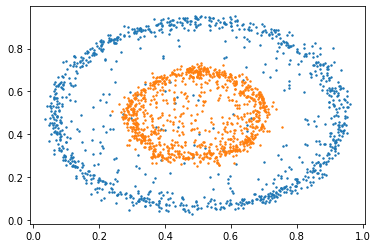

In [5]:
model_normal.visualize()

## Student

In [14]:
reload(cvae_tfp)
data_dim = 2
cond_dim = 1
latent_dim = 4
hidden_dim = 50
x_input = [data, data_cond]
encoder = cvae_tfp.Encoder_Pseudo(data_dim, cond_dim, latent_dim, hidden_dim)
sampler = cvae_tfp.StudentSampler(latent_dim)
encodersampler = cvae_tfp.EncoderSampler(encoder,sampler)
decoder = cvae_tfp.Decoder(data_dim, cond_dim, latent_dim, hidden_dim)
weight = 0.02
model_student = cvae_tfp.CVAE_circle(data_dim, cond_dim, latent_dim, hidden_dim, weight, decoder, encodersampler, analytic = False)
def zero_error(y_true, y_pred):
    return tf.constant(0., dtype='float32')
model_student.compile(optimizer='adam', loss=zero_error)
model_student.evaluate(x = x_input, y = x_input[0])

32/32 [==============================] - 1s 2ms/step - loss: 0.2371


0.24637633562088013

In [15]:
model_student.fit(x = [data, data_cond], y = np.zeros(shape= (data.shape[0],1)), epochs=10000,\
                 batch_size=data.shape[0], verbose = True)

Epoch 1/10000
1/1 [==============================] - 2s 2s/step - loss: 0.2469
Epoch 2/10000
1/1 [==============================] - 0s 16ms/step - loss: 0.2309
Epoch 3/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.2311
Epoch 4/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.2221
Epoch 5/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.2073
Epoch 6/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1964
Epoch 7/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.2027
Epoch 8/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1912
Epoch 9/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1927
Epoch 10/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1818
Epoch 11/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1665
Epoch 12/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1629
Epoch 13/10000
1/1 [=================

1/1 [==============================] - 0s 4ms/step - loss: 0.1303
Epoch 103/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1309
Epoch 104/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1327
Epoch 105/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1324
Epoch 106/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1314
Epoch 107/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1297
Epoch 108/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1284
Epoch 109/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1267
Epoch 110/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1304
Epoch 111/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1304
Epoch 112/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.1291
Epoch 113/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1305
Epoch 114/10000
1/1 [===========

1/1 [==============================] - 0s 5ms/step - loss: 0.1279
Epoch 203/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.1273
Epoch 204/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1280
Epoch 205/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1276
Epoch 206/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1272
Epoch 207/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1283
Epoch 208/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1268
Epoch 209/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1275
Epoch 210/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1269
Epoch 211/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1281
Epoch 212/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1271
Epoch 213/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1285
Epoch 214/10000
1/1 [===========

1/1 [==============================] - 0s 5ms/step - loss: 0.1266
Epoch 303/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1271
Epoch 304/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1272
Epoch 305/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1254
Epoch 306/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1258
Epoch 307/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1263
Epoch 308/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1264
Epoch 309/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1263
Epoch 310/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.1250
Epoch 311/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1260
Epoch 312/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1264
Epoch 313/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.1262
Epoch 314/10000
1/1 [===========

1/1 [==============================] - 0s 5ms/step - loss: 0.1086
Epoch 403/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1077
Epoch 404/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1082
Epoch 405/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1067
Epoch 406/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1062
Epoch 407/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1053
Epoch 408/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1056
Epoch 409/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1061
Epoch 410/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1039
Epoch 411/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1021
Epoch 412/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1040
Epoch 413/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.1000
Epoch 414/10000
1/1 [===========

1/1 [==============================] - 0s 5ms/step - loss: 0.0710
Epoch 503/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0732
Epoch 504/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0722
Epoch 505/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0733
Epoch 506/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0723
Epoch 507/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0728
Epoch 508/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0701
Epoch 509/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0721
Epoch 510/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0736
Epoch 511/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0705
Epoch 512/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0716
Epoch 513/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0712
Epoch 514/10000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 0.0651
Epoch 603/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0652
Epoch 604/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0656
Epoch 605/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0660
Epoch 606/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0654
Epoch 607/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0652
Epoch 608/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0662
Epoch 609/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0648
Epoch 610/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0658
Epoch 611/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0642
Epoch 612/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0644
Epoch 613/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0653
Epoch 614/10000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 0.0637
Epoch 703/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0633
Epoch 704/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0631
Epoch 705/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0633
Epoch 706/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0644
Epoch 707/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0639
Epoch 708/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0634
Epoch 709/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0627
Epoch 710/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0619
Epoch 711/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0640
Epoch 712/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0614
Epoch 713/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0624
Epoch 714/10000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 0.0614
Epoch 803/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0625
Epoch 804/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0619
Epoch 805/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0622
Epoch 806/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0616
Epoch 807/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0614
Epoch 808/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0620
Epoch 809/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0617
Epoch 810/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0605
Epoch 811/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0613
Epoch 812/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0610
Epoch 813/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0614
Epoch 814/10000
1/1 [===========

1/1 [==============================] - 0s 5ms/step - loss: 0.0605
Epoch 903/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0603
Epoch 904/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0594
Epoch 905/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0608
Epoch 906/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0611
Epoch 907/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0595
Epoch 908/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0599
Epoch 909/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0586
Epoch 910/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0593
Epoch 911/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0592
Epoch 912/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0600
Epoch 913/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0593
Epoch 914/10000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 0.0587
Epoch 1003/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0578
Epoch 1004/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0583
Epoch 1005/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0586
Epoch 1006/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0578
Epoch 1007/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0585
Epoch 1008/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0594
Epoch 1009/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0579
Epoch 1010/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0584
Epoch 1011/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0597
Epoch 1012/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0576
Epoch 1013/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0579
Epoch 1014/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0585
Epoch 1101/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0578
Epoch 1102/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0576
Epoch 1103/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0579
Epoch 1104/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0568
Epoch 1105/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0569
Epoch 1106/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0589
Epoch 1107/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0578
Epoch 1108/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0590
Epoch 1109/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0573
Epoch 1110/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0590
Epoch 1111/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0578
Epoch 1112/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0567
Epoch 1199/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0568
Epoch 1200/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0565
Epoch 1201/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0570
Epoch 1202/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0573
Epoch 1203/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0557
Epoch 1204/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0562
Epoch 1205/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0565
Epoch 1206/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0573
Epoch 1207/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0562
Epoch 1208/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0562
Epoch 1209/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0562
Epoch 1210/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0553
Epoch 1297/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0563
Epoch 1298/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0548
Epoch 1299/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0560
Epoch 1300/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0552
Epoch 1301/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0560
Epoch 1302/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0552
Epoch 1303/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0559
Epoch 1304/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0553
Epoch 1305/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0571
Epoch 1306/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0558
Epoch 1307/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0555
Epoch 1308/10000
1/1 

1/1 [==============================] - 0s 5ms/step - loss: 0.0541
Epoch 1395/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0551
Epoch 1396/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0555
Epoch 1397/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0549
Epoch 1398/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0538
Epoch 1399/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0549
Epoch 1400/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0548
Epoch 1401/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0544
Epoch 1402/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0552
Epoch 1403/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0548
Epoch 1404/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0555
Epoch 1405/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0550
Epoch 1406/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0546
Epoch 1493/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0554
Epoch 1494/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0550
Epoch 1495/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0552
Epoch 1496/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0550
Epoch 1497/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0548
Epoch 1498/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0541
Epoch 1499/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0550
Epoch 1500/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0547
Epoch 1501/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0551
Epoch 1502/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0550
Epoch 1503/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0559
Epoch 1504/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0539
Epoch 1591/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0533
Epoch 1592/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0544
Epoch 1593/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0537
Epoch 1594/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0539
Epoch 1595/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0538
Epoch 1596/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0537
Epoch 1597/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0540
Epoch 1598/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0541
Epoch 1599/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0540
Epoch 1600/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0536
Epoch 1601/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0540
Epoch 1602/10000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 0.0529
Epoch 1689/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0531
Epoch 1690/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0534
Epoch 1691/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0539
Epoch 1692/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0536
Epoch 1693/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0533
Epoch 1694/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0532
Epoch 1695/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0531
Epoch 1696/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0530
Epoch 1697/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0530
Epoch 1698/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0526
Epoch 1699/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0534
Epoch 1700/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0523
Epoch 1787/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0525
Epoch 1788/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0516
Epoch 1789/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0523
Epoch 1790/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0526
Epoch 1791/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0521
Epoch 1792/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0528
Epoch 1793/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0535
Epoch 1794/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0527
Epoch 1795/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0517
Epoch 1796/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0517
Epoch 1797/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0519
Epoch 1798/10000
1/1 

1/1 [==============================] - 0s 5ms/step - loss: 0.0518
Epoch 1885/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0510
Epoch 1886/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0517
Epoch 1887/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0512
Epoch 1888/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0508
Epoch 1889/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0506
Epoch 1890/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0520
Epoch 1891/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0510
Epoch 1892/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0522
Epoch 1893/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0517
Epoch 1894/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0513
Epoch 1895/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0517
Epoch 1896/10000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 0.0512
Epoch 1983/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0508
Epoch 1984/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0502
Epoch 1985/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0514
Epoch 1986/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0517
Epoch 1987/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0507
Epoch 1988/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0509
Epoch 1989/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0502
Epoch 1990/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0511
Epoch 1991/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0509
Epoch 1992/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0498
Epoch 1993/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0510
Epoch 1994/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0495
Epoch 2081/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0494
Epoch 2082/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0508
Epoch 2083/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0504
Epoch 2084/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0503
Epoch 2085/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0500
Epoch 2086/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0502
Epoch 2087/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0497
Epoch 2088/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0501
Epoch 2089/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0497
Epoch 2090/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0515
Epoch 2091/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0506
Epoch 2092/10000
1/1 

1/1 [==============================] - 0s 5ms/step - loss: 0.0495
Epoch 2179/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0498
Epoch 2180/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0496
Epoch 2181/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0494
Epoch 2182/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0504
Epoch 2183/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0496
Epoch 2184/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0499
Epoch 2185/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0498
Epoch 2186/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0499
Epoch 2187/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0493
Epoch 2188/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0498
Epoch 2189/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0494
Epoch 2190/10000
1/1 

1/1 [==============================] - 0s 5ms/step - loss: 0.0495
Epoch 2277/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0492
Epoch 2278/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0497
Epoch 2279/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0493
Epoch 2280/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0488
Epoch 2281/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0489
Epoch 2282/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0500
Epoch 2283/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0491
Epoch 2284/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0492
Epoch 2285/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0495
Epoch 2286/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0494
Epoch 2287/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0493
Epoch 2288/10000
1/1 

1/1 [==============================] - 0s 6ms/step - loss: 0.0497
Epoch 2375/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0493
Epoch 2376/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0485
Epoch 2377/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0492
Epoch 2378/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0492
Epoch 2379/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0491
Epoch 2380/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0497
Epoch 2381/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0495
Epoch 2382/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0490
Epoch 2383/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0488
Epoch 2384/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0488
Epoch 2385/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0490
Epoch 2386/10000
1/1 

1/1 [==============================] - 0s 5ms/step - loss: 0.0485
Epoch 2473/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0491
Epoch 2474/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0492
Epoch 2475/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0482
Epoch 2476/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0488
Epoch 2477/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0489
Epoch 2478/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0490
Epoch 2479/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0484
Epoch 2480/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0497
Epoch 2481/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0490
Epoch 2482/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0486
Epoch 2483/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0483
Epoch 2484/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0487
Epoch 2571/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0487
Epoch 2572/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0492
Epoch 2573/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0485
Epoch 2574/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0486
Epoch 2575/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0483
Epoch 2576/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0490
Epoch 2577/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0492
Epoch 2578/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0486
Epoch 2579/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0484
Epoch 2580/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0489
Epoch 2581/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0484
Epoch 2582/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0485
Epoch 2669/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0480
Epoch 2670/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0488
Epoch 2671/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0483
Epoch 2672/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0489
Epoch 2673/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0481
Epoch 2674/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0481
Epoch 2675/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0489
Epoch 2676/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0489
Epoch 2677/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0488
Epoch 2678/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0487
Epoch 2679/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0492
Epoch 2680/10000
1/1 

1/1 [==============================] - 0s 5ms/step - loss: 0.0484
Epoch 2767/10000
1/1 [==============================] - 0s 0s/step - loss: 0.0480
Epoch 2768/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0484
Epoch 2769/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0475
Epoch 2770/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0480
Epoch 2771/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0478
Epoch 2772/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0492
Epoch 2773/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0488
Epoch 2774/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0484
Epoch 2775/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0492
Epoch 2776/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0483
Epoch 2777/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0483
Epoch 2778/10000
1/1 [

Epoch 2865/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0489
Epoch 2866/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0482
Epoch 2867/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0481
Epoch 2868/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0478
Epoch 2869/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0490
Epoch 2870/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0484
Epoch 2871/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0478
Epoch 2872/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0477
Epoch 2873/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0482
Epoch 2874/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0486
Epoch 2875/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0487
Epoch 2876/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0492
Epoc

1/1 [==============================] - 0s 4ms/step - loss: 0.0479
Epoch 2964/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0486
Epoch 2965/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0484
Epoch 2966/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0476
Epoch 2967/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0487
Epoch 2968/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0475
Epoch 2969/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0486
Epoch 2970/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0482
Epoch 2971/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0484
Epoch 2972/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0477
Epoch 2973/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0478
Epoch 2974/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0476
Epoch 2975/10000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 0.0483
Epoch 3062/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0483
Epoch 3063/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0475
Epoch 3064/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0473
Epoch 3065/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0483
Epoch 3066/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0487
Epoch 3067/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0472
Epoch 3068/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0481
Epoch 3069/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0485
Epoch 3070/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0477
Epoch 3071/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0483
Epoch 3072/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0496
Epoch 3073/10000
1/1 

1/1 [==============================] - 0s 5ms/step - loss: 0.0482
Epoch 3160/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0481
Epoch 3161/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0482
Epoch 3162/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0474
Epoch 3163/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0481
Epoch 3164/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0480
Epoch 3165/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0477
Epoch 3166/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0481
Epoch 3167/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0478
Epoch 3168/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0481
Epoch 3169/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0486
Epoch 3170/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0480
Epoch 3171/10000
1/1 

1/1 [==============================] - 0s 6ms/step - loss: 0.0482
Epoch 3258/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0478
Epoch 3259/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0475
Epoch 3260/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0485
Epoch 3261/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0480
Epoch 3262/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0479
Epoch 3263/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0479
Epoch 3264/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0481
Epoch 3265/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0483
Epoch 3266/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0476
Epoch 3267/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0478
Epoch 3268/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0478
Epoch 3269/10000
1/1 

Epoch 3356/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0481
Epoch 3357/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0474
Epoch 3358/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0478
Epoch 3359/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0482
Epoch 3360/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0470
Epoch 3361/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0478
Epoch 3362/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0479
Epoch 3363/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0486
Epoch 3364/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0478
Epoch 3365/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0484
Epoch 3366/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0484
Epoch 3367/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0481
Epoc

1/1 [==============================] - 0s 7ms/step - loss: 0.0474
Epoch 3455/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0477
Epoch 3456/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0477
Epoch 3457/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0478
Epoch 3458/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0477
Epoch 3459/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0478
Epoch 3460/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0477
Epoch 3461/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.0474
Epoch 3462/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0483
Epoch 3463/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0481
Epoch 3464/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0475
Epoch 3465/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0478
Epoch 3466/10000
1/1 

1/1 [==============================] - 0s 5ms/step - loss: 0.0478
Epoch 3553/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0481
Epoch 3554/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0483
Epoch 3555/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0479
Epoch 3556/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0483
Epoch 3557/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0478
Epoch 3558/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0472
Epoch 3559/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0477
Epoch 3560/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0479
Epoch 3561/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0477
Epoch 3562/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0476
Epoch 3563/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0481
Epoch 3564/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0479
Epoch 3651/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0480
Epoch 3652/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0481
Epoch 3653/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0475
Epoch 3654/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0478
Epoch 3655/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0473
Epoch 3656/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0481
Epoch 3657/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0470
Epoch 3658/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0476
Epoch 3659/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0484
Epoch 3660/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0478
Epoch 3661/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0472
Epoch 3662/10000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 0.0479
Epoch 3749/10000
1/1 [==============================] - 0s 0s/step - loss: 0.0479
Epoch 3750/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0479
Epoch 3751/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0481
Epoch 3752/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0483
Epoch 3753/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0475
Epoch 3754/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0478
Epoch 3755/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0478
Epoch 3756/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0474
Epoch 3757/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0472
Epoch 3758/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0475
Epoch 3759/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0475
Epoch 3760/10000
1/1 [

1/1 [==============================] - 0s 5ms/step - loss: 0.0474
Epoch 3847/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0468
Epoch 3848/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0480
Epoch 3849/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0474
Epoch 3850/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0479
Epoch 3851/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0480
Epoch 3852/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0475
Epoch 3853/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0476
Epoch 3854/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0477
Epoch 3855/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0479
Epoch 3856/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0483
Epoch 3857/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0469
Epoch 3858/10000
1/1 

1/1 [==============================] - 0s 2ms/step - loss: 0.0473
Epoch 3945/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0479
Epoch 3946/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0472
Epoch 3947/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0478
Epoch 3948/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0468
Epoch 3949/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0479
Epoch 3950/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0477
Epoch 3951/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0467
Epoch 3952/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0468
Epoch 3953/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0481
Epoch 3954/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0476
Epoch 3955/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0476
Epoch 3956/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0471
Epoch 4043/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0473
Epoch 4044/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0470
Epoch 4045/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0473
Epoch 4046/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0482
Epoch 4047/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0479
Epoch 4048/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0472
Epoch 4049/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0477
Epoch 4050/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0470
Epoch 4051/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0468
Epoch 4052/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0479
Epoch 4053/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0481
Epoch 4054/10000
1/1 

1/1 [==============================] - 0s 2ms/step - loss: 0.0481
Epoch 4141/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0471
Epoch 4142/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0483
Epoch 4143/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0484
Epoch 4144/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0471
Epoch 4145/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0472
Epoch 4146/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0480
Epoch 4147/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0470
Epoch 4148/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0476
Epoch 4149/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0472
Epoch 4150/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0472
Epoch 4151/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0478
Epoch 4152/10000
1/1 

1/1 [==============================] - 0s 5ms/step - loss: 0.0473
Epoch 4239/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0477
Epoch 4240/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0476
Epoch 4241/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0474
Epoch 4242/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0475
Epoch 4243/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0475
Epoch 4244/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0473
Epoch 4245/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0471
Epoch 4246/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0466
Epoch 4247/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0472
Epoch 4248/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0469
Epoch 4249/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0476
Epoch 4250/10000
1/1 

1/1 [==============================] - 0s 5ms/step - loss: 0.0473
Epoch 4337/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0469
Epoch 4338/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0477
Epoch 4339/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0477
Epoch 4340/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0473
Epoch 4341/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0477
Epoch 4342/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0477
Epoch 4343/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0475
Epoch 4344/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0478
Epoch 4345/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0474
Epoch 4346/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0476
Epoch 4347/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0473
Epoch 4348/10000
1/1 

1/1 [==============================] - 0s 5ms/step - loss: 0.0474
Epoch 4435/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.0474
Epoch 4436/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0472
Epoch 4437/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0473
Epoch 4438/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0474
Epoch 4439/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0472
Epoch 4440/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0475
Epoch 4441/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0470
Epoch 4442/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0473
Epoch 4443/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0472
Epoch 4444/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0474
Epoch 4445/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0466
Epoch 4446/10000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 0.0478
Epoch 4533/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0479
Epoch 4534/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0473
Epoch 4535/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0474
Epoch 4536/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0468
Epoch 4537/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0471
Epoch 4538/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0476
Epoch 4539/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0465
Epoch 4540/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0472
Epoch 4541/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0473
Epoch 4542/10000
1/1 [==============================] - 0s 0s/step - loss: 0.0477
Epoch 4543/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0466
Epoch 4544/10000
1/1 [

1/1 [==============================] - 0s 7ms/step - loss: 0.0474
Epoch 4631/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0469
Epoch 4632/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0479
Epoch 4633/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0472
Epoch 4634/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0471
Epoch 4635/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0475
Epoch 4636/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0473
Epoch 4637/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0477
Epoch 4638/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0476
Epoch 4639/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0471
Epoch 4640/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0473
Epoch 4641/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0469
Epoch 4642/10000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 0.0466
Epoch 4729/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0475
Epoch 4730/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0469
Epoch 4731/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0471
Epoch 4732/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0469
Epoch 4733/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0483
Epoch 4734/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0476
Epoch 4735/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0468
Epoch 4736/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0474
Epoch 4737/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0468
Epoch 4738/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0467
Epoch 4739/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0474
Epoch 4740/10000
1/1 

1/1 [==============================] - 0s 5ms/step - loss: 0.0478
Epoch 4827/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0473
Epoch 4828/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0475
Epoch 4829/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0472
Epoch 4830/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0466
Epoch 4831/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0480
Epoch 4832/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0482
Epoch 4833/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0471
Epoch 4834/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0471
Epoch 4835/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0471
Epoch 4836/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0471
Epoch 4837/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0474
Epoch 4838/10000
1/1 

Epoch 4925/10000
1/1 [==============================] - 0s 16ms/step - loss: 0.0472
Epoch 4926/10000
1/1 [==============================] - 0s 0s/step - loss: 0.0465
Epoch 4927/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0473
Epoch 4928/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0472
Epoch 4929/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0470
Epoch 4930/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0466
Epoch 4931/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0470
Epoch 4932/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0472
Epoch 4933/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0471
Epoch 4934/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0470
Epoch 4935/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0478
Epoch 4936/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0473
Epo

1/1 [==============================] - 0s 12ms/step - loss: 0.0478
Epoch 5024/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0469
Epoch 5025/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0467
Epoch 5026/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0479
Epoch 5027/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0469
Epoch 5028/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0470
Epoch 5029/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0468
Epoch 5030/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0477
Epoch 5031/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0475
Epoch 5032/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0472
Epoch 5033/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0467
Epoch 5034/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0473
Epoch 5035/10000
1/1

1/1 [==============================] - 0s 5ms/step - loss: 0.0476
Epoch 5122/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0473
Epoch 5123/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0472
Epoch 5124/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0477
Epoch 5125/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0477
Epoch 5126/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0465
Epoch 5127/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0474
Epoch 5128/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0467
Epoch 5129/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0474
Epoch 5130/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0471
Epoch 5131/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0471
Epoch 5132/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0472
Epoch 5133/10000
1/1 

1/1 [==============================] - 0s 7ms/step - loss: 0.0471
Epoch 5220/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0471
Epoch 5221/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0469
Epoch 5222/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0471
Epoch 5223/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0470
Epoch 5224/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0474
Epoch 5225/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0471
Epoch 5226/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0467
Epoch 5227/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0474
Epoch 5228/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0465
Epoch 5229/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0471
Epoch 5230/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0472
Epoch 5231/10000
1/1 

1/1 [==============================] - 0s 7ms/step - loss: 0.0472
Epoch 5318/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0473
Epoch 5319/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0478
Epoch 5320/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0472
Epoch 5321/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0473
Epoch 5322/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0479
Epoch 5323/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0464
Epoch 5324/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0464
Epoch 5325/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0465
Epoch 5326/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0470
Epoch 5327/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0480
Epoch 5328/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0475
Epoch 5329/10000
1/1 

1/1 [==============================] - 0s 6ms/step - loss: 0.0471
Epoch 5416/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0474
Epoch 5417/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0476
Epoch 5418/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0461
Epoch 5419/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0472
Epoch 5420/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0474
Epoch 5421/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0470
Epoch 5422/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0476
Epoch 5423/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0474
Epoch 5424/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0472
Epoch 5425/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0473
Epoch 5426/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0478
Epoch 5427/10000
1/1 

1/1 [==============================] - 0s 6ms/step - loss: 0.0472
Epoch 5514/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0468
Epoch 5515/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0469
Epoch 5516/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0474
Epoch 5517/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0469
Epoch 5518/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0473
Epoch 5519/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0480
Epoch 5520/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0474
Epoch 5521/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0472
Epoch 5522/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0471
Epoch 5523/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0472
Epoch 5524/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0470
Epoch 5525/10000
1/1 

1/1 [==============================] - 0s 5ms/step - loss: 0.0470
Epoch 5612/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0473
Epoch 5613/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0474
Epoch 5614/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0470
Epoch 5615/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0467
Epoch 5616/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0468
Epoch 5617/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0472
Epoch 5618/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0478
Epoch 5619/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0471
Epoch 5620/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0478
Epoch 5621/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0468
Epoch 5622/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0469
Epoch 5623/10000
1/1 

1/1 [==============================] - 0s 7ms/step - loss: 0.0475
Epoch 5710/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0471
Epoch 5711/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0472
Epoch 5712/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0468
Epoch 5713/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0470
Epoch 5714/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0470
Epoch 5715/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0471
Epoch 5716/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0466
Epoch 5717/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0472
Epoch 5718/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0471
Epoch 5719/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0474
Epoch 5720/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0470
Epoch 5721/10000
1/1 

1/1 [==============================] - 0s 5ms/step - loss: 0.0476
Epoch 5808/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0470
Epoch 5809/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0467
Epoch 5810/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0477
Epoch 5811/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0473
Epoch 5812/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0468
Epoch 5813/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0475
Epoch 5814/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0475
Epoch 5815/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0475
Epoch 5816/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0476
Epoch 5817/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0470
Epoch 5818/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0466
Epoch 5819/10000
1/1 

1/1 [==============================] - 0s 6ms/step - loss: 0.0471
Epoch 5906/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0468
Epoch 5907/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0479
Epoch 5908/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0470
Epoch 5909/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0470
Epoch 5910/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0477
Epoch 5911/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0477
Epoch 5912/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0468
Epoch 5913/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0468
Epoch 5914/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0466
Epoch 5915/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0467
Epoch 5916/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0466
Epoch 5917/10000
1/1 

1/1 [==============================] - 0s 10ms/step - loss: 0.0465
Epoch 6004/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0468
Epoch 6005/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0471
Epoch 6006/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0465
Epoch 6007/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0469
Epoch 6008/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0465
Epoch 6009/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0466
Epoch 6010/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0469
Epoch 6011/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0474
Epoch 6012/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0469
Epoch 6013/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0468
Epoch 6014/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0465
Epoch 6015/10000
1/1

1/1 [==============================] - 0s 6ms/step - loss: 0.0472
Epoch 6102/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0466
Epoch 6103/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0476
Epoch 6104/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0469
Epoch 6105/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0468
Epoch 6106/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0474
Epoch 6107/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0468
Epoch 6108/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0465
Epoch 6109/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0469
Epoch 6110/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0469
Epoch 6111/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0470
Epoch 6112/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0472
Epoch 6113/10000
1/1 

1/1 [==============================] - 0s 6ms/step - loss: 0.0472
Epoch 6200/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0469
Epoch 6201/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0468
Epoch 6202/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0466
Epoch 6203/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0473
Epoch 6204/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0468
Epoch 6205/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0472
Epoch 6206/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0471
Epoch 6207/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0466
Epoch 6208/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0474
Epoch 6209/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0462
Epoch 6210/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0471
Epoch 6211/10000
1/1 

1/1 [==============================] - 0s 7ms/step - loss: 0.0472
Epoch 6298/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0468
Epoch 6299/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0466
Epoch 6300/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0473
Epoch 6301/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0467
Epoch 6302/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0466
Epoch 6303/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0473
Epoch 6304/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0473
Epoch 6305/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0475
Epoch 6306/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0467
Epoch 6307/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0462
Epoch 6308/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0470
Epoch 6309/10000
1/1 

1/1 [==============================] - 0s 5ms/step - loss: 0.0474
Epoch 6396/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0468
Epoch 6397/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0468
Epoch 6398/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0470
Epoch 6399/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0468
Epoch 6400/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0468
Epoch 6401/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0463
Epoch 6402/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0469
Epoch 6403/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0469
Epoch 6404/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0471
Epoch 6405/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0462
Epoch 6406/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0473
Epoch 6407/10000
1/1 

1/1 [==============================] - 0s 7ms/step - loss: 0.0468
Epoch 6494/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0461
Epoch 6495/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0472
Epoch 6496/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0469
Epoch 6497/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0475
Epoch 6498/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0466
Epoch 6499/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0472
Epoch 6500/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0468
Epoch 6501/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0473
Epoch 6502/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0473
Epoch 6503/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0468
Epoch 6504/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0462
Epoch 6505/10000
1/1 

1/1 [==============================] - 0s 8ms/step - loss: 0.0476
Epoch 6592/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0470
Epoch 6593/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0473
Epoch 6594/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0463
Epoch 6595/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0467
Epoch 6596/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0470
Epoch 6597/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0471
Epoch 6598/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0473
Epoch 6599/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0472
Epoch 6600/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0472
Epoch 6601/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0468
Epoch 6602/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0472
Epoch 6603/10000
1/1 

1/1 [==============================] - 0s 6ms/step - loss: 0.0466
Epoch 6690/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0471
Epoch 6691/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0466
Epoch 6692/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0471
Epoch 6693/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0475
Epoch 6694/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0467
Epoch 6695/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0471
Epoch 6696/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0470
Epoch 6697/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0467
Epoch 6698/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0470
Epoch 6699/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0471
Epoch 6700/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0467
Epoch 6701/10000
1/1 

1/1 [==============================] - 0s 6ms/step - loss: 0.0469
Epoch 6788/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0463
Epoch 6789/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0467
Epoch 6790/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0466
Epoch 6791/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0464
Epoch 6792/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0467
Epoch 6793/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0470
Epoch 6794/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0468
Epoch 6795/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0467
Epoch 6796/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0473
Epoch 6797/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0468
Epoch 6798/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0470
Epoch 6799/10000
1/1 

1/1 [==============================] - 0s 6ms/step - loss: 0.0467
Epoch 6886/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0472
Epoch 6887/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0466
Epoch 6888/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0467
Epoch 6889/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0466
Epoch 6890/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0467
Epoch 6891/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0472
Epoch 6892/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0469
Epoch 6893/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0474
Epoch 6894/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0468
Epoch 6895/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0458
Epoch 6896/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0473
Epoch 6897/10000
1/1 

1/1 [==============================] - 0s 6ms/step - loss: 0.0470
Epoch 6984/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0467
Epoch 6985/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0473
Epoch 6986/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0471
Epoch 6987/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0466
Epoch 6988/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0470
Epoch 6989/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0466
Epoch 6990/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0463
Epoch 6991/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0474
Epoch 6992/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0474
Epoch 6993/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0466
Epoch 6994/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0470
Epoch 6995/10000
1/1 

1/1 [==============================] - 0s 6ms/step - loss: 0.0468
Epoch 7082/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0474
Epoch 7083/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0466
Epoch 7084/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0471
Epoch 7085/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0465
Epoch 7086/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0475
Epoch 7087/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0466
Epoch 7088/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0466
Epoch 7089/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0470
Epoch 7090/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0461
Epoch 7091/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0471
Epoch 7092/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0471
Epoch 7093/10000
1/1 

1/1 [==============================] - 0s 7ms/step - loss: 0.0475
Epoch 7180/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0465
Epoch 7181/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0466
Epoch 7182/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0463
Epoch 7183/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0462
Epoch 7184/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0470
Epoch 7185/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0467
Epoch 7186/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0468
Epoch 7187/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0475
Epoch 7188/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0467
Epoch 7189/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0474
Epoch 7190/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0472
Epoch 7191/10000
1/1 

1/1 [==============================] - 0s 7ms/step - loss: 0.0469
Epoch 7278/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0464
Epoch 7279/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0474
Epoch 7280/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0475
Epoch 7281/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0478
Epoch 7282/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0471
Epoch 7283/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0471
Epoch 7284/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0470
Epoch 7285/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0471
Epoch 7286/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0465
Epoch 7287/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0462
Epoch 7288/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0471
Epoch 7289/10000
1/1 

1/1 [==============================] - 0s 7ms/step - loss: 0.0469
Epoch 7376/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0466
Epoch 7377/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0465
Epoch 7378/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0472
Epoch 7379/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0465
Epoch 7380/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0471
Epoch 7381/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0460
Epoch 7382/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0468
Epoch 7383/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0469
Epoch 7384/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0467
Epoch 7385/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0465
Epoch 7386/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0467
Epoch 7387/10000
1/1 

1/1 [==============================] - 0s 7ms/step - loss: 0.0469
Epoch 7474/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0469
Epoch 7475/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0464
Epoch 7476/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0463
Epoch 7477/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0466
Epoch 7478/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0473
Epoch 7479/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0466
Epoch 7480/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0471
Epoch 7481/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0464
Epoch 7482/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0464
Epoch 7483/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0466
Epoch 7484/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0466
Epoch 7485/10000
1/1 

1/1 [==============================] - 0s 7ms/step - loss: 0.0468
Epoch 7572/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0469
Epoch 7573/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0464
Epoch 7574/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0469
Epoch 7575/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0471
Epoch 7576/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0463
Epoch 7577/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0469
Epoch 7578/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0472
Epoch 7579/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0466
Epoch 7580/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0468
Epoch 7581/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0468
Epoch 7582/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0470
Epoch 7583/10000
1/1 

1/1 [==============================] - 0s 5ms/step - loss: 0.0465
Epoch 7670/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0472
Epoch 7671/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0464
Epoch 7672/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0474
Epoch 7673/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0470
Epoch 7674/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0464
Epoch 7675/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0466
Epoch 7676/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0469
Epoch 7677/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0467
Epoch 7678/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0463
Epoch 7679/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0466
Epoch 7680/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0463
Epoch 7681/10000
1/1 

1/1 [==============================] - 0s 6ms/step - loss: 0.0464
Epoch 7768/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0473
Epoch 7769/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0470
Epoch 7770/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0467
Epoch 7771/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0474
Epoch 7772/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0459
Epoch 7773/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0472
Epoch 7774/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0472
Epoch 7775/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0476
Epoch 7776/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0470
Epoch 7777/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0472
Epoch 7778/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0471
Epoch 7779/10000
1/1 

1/1 [==============================] - 0s 6ms/step - loss: 0.0467
Epoch 7866/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0467
Epoch 7867/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0469
Epoch 7868/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0467
Epoch 7869/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0472
Epoch 7870/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0471
Epoch 7871/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0463
Epoch 7872/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0465
Epoch 7873/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0474
Epoch 7874/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0473
Epoch 7875/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0471
Epoch 7876/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0467
Epoch 7877/10000
1/1 

1/1 [==============================] - 0s 6ms/step - loss: 0.0471
Epoch 7964/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0470
Epoch 7965/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0472
Epoch 7966/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0466
Epoch 7967/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0465
Epoch 7968/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0472
Epoch 7969/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0466
Epoch 7970/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0470
Epoch 7971/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0467
Epoch 7972/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0467
Epoch 7973/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0465
Epoch 7974/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0469
Epoch 7975/10000
1/1 

1/1 [==============================] - 0s 6ms/step - loss: 0.0470
Epoch 8062/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0465
Epoch 8063/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0466
Epoch 8064/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0466
Epoch 8065/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0472
Epoch 8066/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0462
Epoch 8067/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0467
Epoch 8068/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0463
Epoch 8069/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0471
Epoch 8070/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0468
Epoch 8071/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0467
Epoch 8072/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0472
Epoch 8073/10000
1/1 

1/1 [==============================] - 0s 6ms/step - loss: 0.0465
Epoch 8160/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0471
Epoch 8161/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0469
Epoch 8162/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0465
Epoch 8163/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0470
Epoch 8164/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0466
Epoch 8165/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0472
Epoch 8166/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0465
Epoch 8167/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0467
Epoch 8168/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0472
Epoch 8169/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0466
Epoch 8170/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0470
Epoch 8171/10000
1/1 

1/1 [==============================] - 0s 7ms/step - loss: 0.0464
Epoch 8258/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0470
Epoch 8259/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0462
Epoch 8260/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0465
Epoch 8261/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0460
Epoch 8262/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0465
Epoch 8263/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0467
Epoch 8264/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0470
Epoch 8265/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0474
Epoch 8266/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0469
Epoch 8267/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0468
Epoch 8268/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0471
Epoch 8269/10000
1/1 

1/1 [==============================] - 0s 7ms/step - loss: 0.0472
Epoch 8356/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0467
Epoch 8357/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0469
Epoch 8358/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0479
Epoch 8359/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0467
Epoch 8360/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0466
Epoch 8361/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0466
Epoch 8362/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0468
Epoch 8363/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0467
Epoch 8364/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0468
Epoch 8365/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0467
Epoch 8366/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0473
Epoch 8367/10000
1/1 

1/1 [==============================] - 0s 6ms/step - loss: 0.0468
Epoch 8454/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0474
Epoch 8455/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0468
Epoch 8456/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0473
Epoch 8457/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0471
Epoch 8458/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0462
Epoch 8459/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0467
Epoch 8460/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0471
Epoch 8461/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0464
Epoch 8462/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0467
Epoch 8463/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0464
Epoch 8464/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0470
Epoch 8465/10000
1/1 

1/1 [==============================] - 0s 6ms/step - loss: 0.0468
Epoch 8552/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0467
Epoch 8553/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0461
Epoch 8554/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0470
Epoch 8555/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0469
Epoch 8556/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0467
Epoch 8557/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0469
Epoch 8558/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0468
Epoch 8559/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0473
Epoch 8560/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0470
Epoch 8561/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0471
Epoch 8562/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0461
Epoch 8563/10000
1/1 

1/1 [==============================] - 0s 6ms/step - loss: 0.0464
Epoch 8650/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0470
Epoch 8651/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0469
Epoch 8652/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0467
Epoch 8653/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0476
Epoch 8654/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0459
Epoch 8655/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0469
Epoch 8656/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0466
Epoch 8657/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0467
Epoch 8658/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0468
Epoch 8659/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0474
Epoch 8660/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0465
Epoch 8661/10000
1/1 

1/1 [==============================] - 0s 6ms/step - loss: 0.0465
Epoch 8748/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0471
Epoch 8749/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0466
Epoch 8750/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0470
Epoch 8751/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0470
Epoch 8752/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0464
Epoch 8753/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0466
Epoch 8754/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0468
Epoch 8755/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0463
Epoch 8756/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0476
Epoch 8757/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0476
Epoch 8758/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0467
Epoch 8759/10000
1/1 

1/1 [==============================] - 0s 6ms/step - loss: 0.0466
Epoch 8846/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0479
Epoch 8847/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0468
Epoch 8848/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0468
Epoch 8849/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0469
Epoch 8850/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0470
Epoch 8851/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0471
Epoch 8852/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0469
Epoch 8853/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0463
Epoch 8854/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0463
Epoch 8855/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0466
Epoch 8856/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0463
Epoch 8857/10000
1/1 

1/1 [==============================] - 0s 5ms/step - loss: 0.0464
Epoch 8944/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0467
Epoch 8945/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0461
Epoch 8946/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0464
Epoch 8947/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0470
Epoch 8948/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0468
Epoch 8949/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0462
Epoch 8950/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0464
Epoch 8951/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0466
Epoch 8952/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0467
Epoch 8953/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0471
Epoch 8954/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0464
Epoch 8955/10000
1/1 

1/1 [==============================] - 0s 6ms/step - loss: 0.0462
Epoch 9042/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0468
Epoch 9043/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0471
Epoch 9044/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0463
Epoch 9045/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0472
Epoch 9046/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0461
Epoch 9047/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0461
Epoch 9048/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0466
Epoch 9049/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0472
Epoch 9050/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0468
Epoch 9051/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0463
Epoch 9052/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0466
Epoch 9053/10000
1/1 

1/1 [==============================] - 0s 7ms/step - loss: 0.0467
Epoch 9140/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0467
Epoch 9141/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0472
Epoch 9142/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0469
Epoch 9143/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0478
Epoch 9144/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0468
Epoch 9145/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0470
Epoch 9146/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0469
Epoch 9147/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0466
Epoch 9148/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0467
Epoch 9149/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0468
Epoch 9150/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0465
Epoch 9151/10000
1/1 

1/1 [==============================] - 0s 6ms/step - loss: 0.0468
Epoch 9238/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0468
Epoch 9239/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0463
Epoch 9240/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0469
Epoch 9241/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0468
Epoch 9242/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0472
Epoch 9243/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0462
Epoch 9244/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0467
Epoch 9245/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0463
Epoch 9246/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0471
Epoch 9247/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0463
Epoch 9248/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0470
Epoch 9249/10000
1/1 

1/1 [==============================] - 0s 7ms/step - loss: 0.0468
Epoch 9336/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0466
Epoch 9337/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0468
Epoch 9338/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0469
Epoch 9339/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0468
Epoch 9340/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0458
Epoch 9341/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0457
Epoch 9342/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0467
Epoch 9343/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0476
Epoch 9344/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0467
Epoch 9345/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0464
Epoch 9346/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0466
Epoch 9347/10000
1/1 

1/1 [==============================] - 0s 7ms/step - loss: 0.0468
Epoch 9434/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0469
Epoch 9435/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0469
Epoch 9436/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0469
Epoch 9437/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0471
Epoch 9438/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0460
Epoch 9439/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0467
Epoch 9440/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0468
Epoch 9441/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0467
Epoch 9442/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0464
Epoch 9443/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0463
Epoch 9444/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0462
Epoch 9445/10000
1/1 

1/1 [==============================] - 0s 7ms/step - loss: 0.0467
Epoch 9532/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0467
Epoch 9533/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0469
Epoch 9534/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0469
Epoch 9535/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0465
Epoch 9536/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0469
Epoch 9537/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0470
Epoch 9538/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0467
Epoch 9539/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0464
Epoch 9540/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0468
Epoch 9541/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0474
Epoch 9542/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0466
Epoch 9543/10000
1/1 

1/1 [==============================] - 0s 7ms/step - loss: 0.0466
Epoch 9630/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0472
Epoch 9631/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0456
Epoch 9632/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0469
Epoch 9633/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0463
Epoch 9634/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0465
Epoch 9635/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0469
Epoch 9636/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0460
Epoch 9637/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0465
Epoch 9638/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0465
Epoch 9639/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0465
Epoch 9640/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0473
Epoch 9641/10000
1/1 

1/1 [==============================] - 0s 6ms/step - loss: 0.0460
Epoch 9728/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0468
Epoch 9729/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0469
Epoch 9730/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0468
Epoch 9731/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0466
Epoch 9732/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0467
Epoch 9733/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0468
Epoch 9734/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0469
Epoch 9735/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0462
Epoch 9736/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0471
Epoch 9737/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0468
Epoch 9738/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0458
Epoch 9739/10000
1/1 

1/1 [==============================] - 0s 6ms/step - loss: 0.0470
Epoch 9826/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0466
Epoch 9827/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0470
Epoch 9828/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0470
Epoch 9829/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0469
Epoch 9830/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0469
Epoch 9831/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0463
Epoch 9832/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0471
Epoch 9833/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0469
Epoch 9834/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0465
Epoch 9835/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0462
Epoch 9836/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0467
Epoch 9837/10000
1/1 

1/1 [==============================] - 0s 6ms/step - loss: 0.0468
Epoch 9924/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0472
Epoch 9925/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0469
Epoch 9926/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0463
Epoch 9927/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0468
Epoch 9928/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0471
Epoch 9929/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0466
Epoch 9930/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0459
Epoch 9931/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0462
Epoch 9932/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0470
Epoch 9933/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0466
Epoch 9934/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0463
Epoch 9935/10000
1/1 

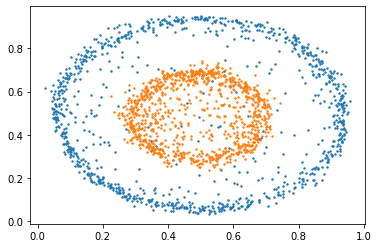

In [16]:
model_student.visualize()

In [17]:
pseudoinput = model_student.encodersampler.trainable_variables[-2:]
df,_,_ = model_student.encodersampler.encoder(pseudoinput)

In [18]:
df

<tf.Tensor: shape=(), dtype=float32, numpy=15994496.0>